## 1-D interacting quantum particles

This code solves the time-dependent Schrodinger equation: $$\large \frac{\partial}{\partial t}\psi(x_{1},x_{2},t)\;=\;-iH\psi(x_{1},x_{2},t)$$ where the hamiltonian $H$ is given by: $$\large H=~-{\frac{1}{2m_{1}}}{\frac{\partial^{2}}{\partial x_{1}^{2}}}-{\frac{1}{2m_{2}}}{\frac{\partial^{2}}{\partial x_{2}^{2}}}+V(x_{1},x_{2})$$ where the reduced Planck constant has been set to one: $\hslash = 1$.

In particular, the potential $V(x_{1},x_{2})$ can be an *interaction potential*. Thus the dependence is usually proportional to the displacement vector $\bold{r} = |x_1 - x_2|$. In the following cell the expression for the potential is: $$\large V(x_{1},x_{2}) = -V_0e^{-\frac{|x_1 - x_2|^2}{\alpha^2}}$$
with $V_0 = 5$ and $\alpha=2$.

Since this is an IVP (Initial Value Problem), we have to provide the starting wavefunction. We choose it as multiplication of two gaussian wavepackets:
$$\large \psi(x_{1},x_{2},t=0)=e^{i k_{1}x_{1}}e^{-\frac{(x_{1}-x_{1}^{0})^{2}}{4\sigma^{2}}}\times e^{i k_{2}x_{2}}e^{-\frac{(x_{2}-x_{2}^{0})^{2}}{4\sigma^{2}}}$$
We consider two identical particles and set their masses equal to one $m_1 = m_2 = 1$

N.B.: we have to talk about **one** wavefunction that describes both particles, not multiple wavefunctions (one for each particle). 

In [1]:
from math import sqrt
import numpy as np
from pde import PDE, CartesianGrid, MemoryStorage, ScalarField, plot_kymograph, movie, FieldCollection
from pde import FieldCollection, PDEBase, UnitGrid, plot_kymographs


grid = CartesianGrid([[0, 20],[0,20]], [100,100], periodic=False)  # generate grid

# create a (normalized) wave packet with a certain form as an initial condition

p1 = 'exp(I * x) * exp(-(x - 7.)**2)'
p2 = 'exp(-I * y) * exp(-(y - 13.)**2)' 

particles = p1 + '*' + p2

initial_state = ScalarField.from_expression(grid, particles)
initial_state /= sqrt(initial_state.to_scalar("norm_squared").integral.real)

#grid = UnitGrid([32, 32])

storage = MemoryStorage()

user_funcs={"get_x": lambda arr: arr[0], "get_y": lambda arr: arr[1], 'abs': lambda i: np.abs(i), 'exp': lambda x: np.exp(x)}

#eq = PDE({"psi": f"I*get_x(gradient(get_x(gradient(psi))) ) + I*get_y(gradient(get_y(gradient(psi)))) + I*5.*exp(-abs(x-y)**2/4)*psi "}, user_funcs=user_funcs) 
eq = PDE({"psi": f"I*laplace(psi) + I*5.*exp(-abs(x-y)**2/4)*psi "}, user_funcs=user_funcs) 


# solve the pde and store intermediate data
storage = MemoryStorage()
eq.solve(initial_state, t_range=2.5, dt=1e-5, tracker=[storage.tracker(0.02)])

movie(storage, filename = './multiparticle.mp4', plot_args={'scalar':'norm_squared'})

/home/luca/.local/lib/python3.8/site-packages/matplotlib/__init__.py:152: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(module.__version__) < minver:
/home/luca/.local/lib/python3.8/site-packages/setuptools/_distutils/version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
/home/luca/.local/lib/python3.8/site-packages/numba/np/arraymath.py:3845: DeprecationWarning: `np.MachAr` is deprecated (NumPy 1.22).
  @overload(np.MachAr)


  0%|          | 0/126 [00:00<?, ?it/s]

Only the absolute value of complex data is shown
Only the absolute value of complex data is shown
Only the absolute value of complex data is shown
Only the absolute value of complex data is shown
Only the absolute value of complex data is shown
Only the absolute value of complex data is shown
Only the absolute value of complex data is shown
Only the absolute value of complex data is shown
Only the absolute value of complex data is shown
Only the absolute value of complex data is shown
Only the absolute value of complex data is shown
Only the absolute value of complex data is shown
Only the absolute value of complex data is shown
Only the absolute value of complex data is shown
Only the absolute value of complex data is shown
Only the absolute value of complex data is shown
Only the absolute value of complex data is shown
Only the absolute value of complex data is shown
Only the absolute value of complex data is shown
Only the absolute value of complex data is shown
Only the absolute va

For a two particle system, a meaningful one-particle probability density can be obtained by the formula:
$$\rho_{1}(x_{i},t)=\int_{-\infty}^{+\infty}d x_{j}\,\rho(x_{1},x_{2},t),\ \ (i\neq j=1,2)$$
It is important to check the conservation of total probability:

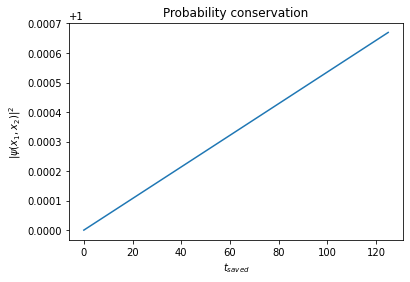

In [8]:
import matplotlib.pyplot as plt

plt.show()

tot_prob = []
for s in storage:
    tot_prob.append(s.apply(lambda x: np.abs(x)**2).integral.real)

plt.xlabel('$t_{saved}$')
plt.ylabel('$|\\psi(x_1,x_2)|^2$')
plt.title('Probability conservation')

plt.plot(tot_prob)
plt.show()

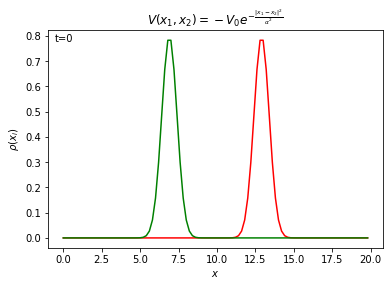

In [4]:
import numpy as np
import matplotlib.animation as animation

x = np.arange(0,20,20/100)
rho = np.abs(storage[0].data).T**2
y = np.trapz(rho, x = np.arange(0,20,20/100))
z = np.trapz(rho, x = np.arange(0,20,20/100), axis = 0)

fig, ax = plt.subplots()
line1, = ax.plot(x, y, color = "r")
line2, = ax.plot(x, z, color = "g")

time_text = ax.text(0.02, 0.95, '', transform=ax.transAxes)

ax.set_title('$V(x_{1},x_{2}) = -V_0e^{-\\frac{|x_1 - x_2|^2}{\\alpha^2}}$')


def update(num, x, y, z, line1, line2):
    rho = np.abs(storage[num].data).T**2
    rho1 = np.trapz(rho, x = np.arange(0,20,20/100))
    rho2 = np.trapz(rho, x = np.arange(0,20,20/100), axis = 0)

    time_text.set_text('t=' + str(num))

    line1.set_data(x, rho1)
    line2.set_data(x, rho2)
    return [line1,line2]

ani = animation.FuncAnimation(fig, update, len(tot_prob), fargs=[x, y, z, line1, line2],
                  interval=295, blit=True)

ax.set_xlabel('$x$')
ax.set_ylabel('$\\rho(x_i)$')

plt.show()
 
writervideo = animation.FFMpegWriter(fps=60) 
ani.save('prob_densities.mp4', writer=writervideo, dpi=300)

